# Mission 2. 패션 스타일 선호 여부 예측
> 2-1. 주어진 라벨링 데이터의 파일 명은 아래와 같은 형식이다.<br>
> "{W/T}\_{이미지ID}\_{시대별}\_{스타일별}\_{성별}\_{설문ID}.json"<br>
> 이에 기반하여 "설문ID" 수 기준으로 "성별&스타일" 통계치를 아래 표 형식으로 기입한다.

## (1) 유효한 label data filtering

In [1]:
# 필요 라이브러리 import
import os
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')
pd.options.display.max_columns = 100

# 데이터셋 경로 설정
t_label_path = "../dataset/training_label"
v_label_path = "../dataset/validation_label"
t_img_path = "../dataset/training_image"
v_img_path = "../dataset/validation_image"

> 이미지 데이터셋에 대한 메타데이터를 DataFrame으로 만들어서 저장

In [2]:
from IPython.display import display_html

# 파일 리스트
t_image_list = os.listdir(t_img_path)
v_image_list = os.listdir(v_img_path)

# train과 validation 데이터셋의 이미지 수를 확인
print(f"train image: {len(os.listdir(t_img_path))}, validation image: {len(os.listdir(v_img_path))}")

# 파일리스트 -> 메타데이터 Pandas 객체
def img2data(image_list):
    data = []
    for i in range(len(image_list)):
        meta_data = image_list[i].split('_')

        file_name = image_list[i][:-4]
        wt = meta_data[0]
        image_id = meta_data[1]
        time = meta_data[2]
        style = meta_data[3]
        gender = meta_data[4][0]

        row = {
            'file_name': file_name,
            'wt': wt,
            'image_id': image_id,
            'time': time,
            'style': style,
            'gender': gender
        }
        data.append(row)
    return pd.DataFrame(data)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 변환 적용
t_img_df = img2data(t_image_list)
v_img_df = img2data(v_image_list)

# 결과 확인
display_left(t_img_df.head(), v_img_df.head())

train image: 4070, validation image: 951


,file_name,wt,image_id,time,style,gender
0,T_00253_60_popart_W,T,00253,60,popart,W
1,T_00456_10_sportivecasual_M,T,00456,10,sportivecasual,M
2,T_00588_10_sportivecasual_M,T,00588,10,sportivecasual,M
3,T_00770_60_minimal_W,T,00770,60,minimal,W
4,T_00893_90_hiphop_W,T,00893,90,hiphop,W
,file_name,wt,image_id,time,style,gender
0,T_00253_60_popart_W,T,00253,60,popart,W
1,T_00456_10_sportivecasual_M,T,00456,10,sportivecasual,M
2,T_01123_90_hiphop_M,T,01123,90,hiphop,M
3,T_01514_50_ivy_M,T,01514,50,ivy,M


> 데이터를 확인해보니, train과 validation 파일명의 중복이 확인되어 실제 중복된 이미지를 확인 (529장의 중복 확인)

In [3]:
# train과 validation에서 중복된 이미지 이름 확인
t_file_names = t_img_df['file_name'].values
v_img_df[v_img_df['file_name'].isin(t_file_names)]

,file_name,wt,image_id,time,style,gender
0,T_00253_60_popart_W,T,00253,60,popart,W
1,T_00456_10_sportivecasual_M,T,00456,10,sportivecasual,M
6,T_14538_00_cityglam_W,T,14538,00,cityglam,W
7,T_21986_70_hippie_M,T,21986,70,hippie,M
9,T_21992_70_hippie_M,T,21992,70,hippie,M
...,...,...,...,...,...,...
945,W_62313_00_oriental_W,W,62313,00,oriental,W
947,W_63644_10_sportivecasual_M,W,63644,10,sportivecasual,M
948,W_64047_10_sportivecasual_W,W,64047,10,sportivecasual,W
949,W_64332_80_powersuit_W,W,64332,80,powersuit,W


> labeling 파일의 메타데이터를 DataFrame으로 저장

In [4]:
# 파일 리스트
t_label_list = os.listdir(t_label_path)
v_label_list = os.listdir(v_label_path)

# train과 validation 데이터셋의 label 수를 확인
print(f"train label: {len(os.listdir(t_label_path))}, validation label: {len(os.listdir(v_label_path))}")

# 파일리스트 -> 메타데이터 Pandas 객체
def label2data(label_list):
    data = []

    for i in range(len(label_list)):
        meta_data = label_list[i].split('_')

        file_name = label_list[i][:-5]
        wt = meta_data[0]
        image_id = meta_data[1]
        time = meta_data[2]
        style = meta_data[3]
        gender = meta_data[4]
        survey_id = meta_data[5].split('.')[0]

        row = {
            'file_name': file_name,
            'wt': wt,
            'image_id': image_id,
            'time': time,
            'style': style,
            'gender': gender,
            'survey_id': survey_id,
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
t_lbl_df = label2data(t_label_list)
v_lbl_df = label2data(v_label_list)

# 결과 확인
display_left(t_lbl_df.head(), v_lbl_df.head())

train label: 211346, validation label: 36383


,file_name,wt,image_id,time,style,gender,survey_id
0,T_00001_50_ivy_M_041317,T,00001,50,ivy,M,041317
1,T_00001_50_ivy_M_197195,T,00001,50,ivy,M,197195
2,T_00001_50_ivy_M_208803,T,00001,50,ivy,M,208803
3,T_00001_50_ivy_M_211499,T,00001,50,ivy,M,211499
4,T_00001_50_ivy_M_227846,T,00001,50,ivy,M,227846
,file_name,wt,image_id,time,style,gender,survey_id
0,T_00017_19_normcore_M_148650,T,00017,19,normcore,M,148650
1,T_00031_10_sportivecasual_M_167884,T,00031,10,sportivecasual,M,167884
2,T_00031_10_sportivecasual_M_208711,T,00031,10,sportivecasual,M,208711
3,T_00035_19_normcore_M_214128,T,00035,19,normcore,M,214128


> 문제에서 제시된 것처럼 `이미지ID`를 기준으로 유효한 labeling data의 필터링을 진행

In [7]:
# t_img_df: train 이미지 파일의 메타데이터, v_img_df: validation 이미지 파일의 메타데이터
# t_lbl_df: train label 파일의 메타데이터, v_lbl_df: validation label 파일의 메타데이터
t_img_ids = t_img_df['image_id'].unique()
v_img_ids = v_img_df['image_id'].unique()

filtered_t_lbl = t_lbl_df[t_lbl_df['image_id'].isin(t_img_ids)]
filtered_v_lbl = v_lbl_df[v_lbl_df['image_id'].isin(v_img_ids)]

filtered_t_lbl

,file_name,wt,image_id,time,style,gender,survey_id
10,T_00004_90_hiphop_M_071538,T,00004,90,hiphop,M,071538
11,T_00004_90_hiphop_M_203010,T,00004,90,hiphop,M,203010
12,T_00004_90_hiphop_M_206164,T,00004,90,hiphop,M,206164
22,T_00007_19_normcore_M_202479,T,00007,19,normcore,M,202479
50,T_00023_10_sportivecasual_M_062946,T,00023,10,sportivecasual,M,062946
...,...,...,...,...,...,...,...
187866,W_71934_60_mods_M_233707,W,71934,60,mods,M,233707
187867,W_71935_60_mods_M_227246,W,71935,60,mods,M,227246
187868,W_71935_60_mods_M_233715,W,71935,60,mods,M,233715
187869,W_71936_60_mods_M_227252,W,71936,60,mods,M,227252


> 팀에서 판단하기를, 이미지ID만 동일하고 실제로는 다른 이미지 데이터에 대한 label도 filtering 되었다고 판단하여 확인

In [8]:
# 이미지ID가 "00004"인 이미지 정보 확인
t_img_df[t_img_df['image_id'] == '00004']

,file_name,wt,image_id,time,style,gender
61,W_00004_50_ivy_M,W,00004,50,ivy,M


In [9]:
# 이미지ID가 "00004"인 라벨 정보 확인
t_lbl_df[t_lbl_df['image_id'] == '00004']

,file_name,wt,image_id,time,style,gender,survey_id
10,T_00004_90_hiphop_M_071538,T,00004,90,hiphop,M,071538
11,T_00004_90_hiphop_M_203010,T,00004,90,hiphop,M,203010
12,T_00004_90_hiphop_M_206164,T,00004,90,hiphop,M,206164
30127,W_00004_50_ivy_M_060212,W,00004,50,ivy,M,060212
30128,W_00004_50_ivy_M_067526,W,00004,50,ivy,M,067526
30129,W_00004_50_ivy_M_092597,W,00004,50,ivy,M,092597
30130,W_00004_50_ivy_M_134675,W,00004,50,ivy,M,134675
30131,W_00004_50_ivy_M_153260,W,00004,50,ivy,M,153260
30132,W_00004_50_ivy_M_179491,W,00004,50,ivy,M,179491
30133,W_00004_50_ivy_M_185102,W,00004,50,ivy,M,185102


> 실제로 동일한 이미지ID(00004)를 가졌지만, 시대와 스타일이 다른 이미지에 대한 labeling 파일도 filtering이 되었음을 확인<br>
> "파일명"이 모두 동일한 labeling 데이터를 유효한 데이터로 간주하고 다시 필터링 진행

In [11]:
# label 파일에서 "설문ID"를 제외한 이미지 파일명
t_lbl_df['survey_filename'] = t_lbl_df['file_name'].apply(lambda x: x[:-7])
v_lbl_df['survey_filename'] = v_lbl_df['file_name'].apply(lambda x: x[:-7])

In [12]:
# t_img_df: train 이미지 파일의 메타데이터, v_img_df: validation 이미지 파일의 메타데이터
# t_lbl_df: train label 파일의 메타데이터, v_lbl_df: validation label 파일의 메타데이터
t_img_filenames = t_img_df['file_name'].unique()
v_img_filenames = v_img_df['file_name'].unique()

filtered_t_lbl = t_lbl_df[t_lbl_df['survey_filename'].isin(t_img_filenames)].reset_index(drop=True)
filtered_v_lbl = v_lbl_df[v_lbl_df['survey_filename'].isin(v_img_filenames)].reset_index(drop=True)
filtered_t_lbl = filtered_t_lbl.drop(columns=['survey_filename'])
filtered_v_lbl = filtered_v_lbl.drop(columns=['survey_filename'])

In [15]:
filtered_t_lbl

,file_name,wt,image_id,time,style,gender,survey_id
0,T_00253_60_popart_W_079277,T,00253,60,popart,W,079277
1,T_00253_60_popart_W_107429,T,00253,60,popart,W,107429
2,T_00253_60_popart_W_144566,T,00253,60,popart,W,144566
3,T_00253_60_popart_W_200551,T,00253,60,popart,W,200551
4,T_00253_60_popart_W_203632,T,00253,60,popart,W,203632
...,...,...,...,...,...,...,...
16091,W_71934_60_mods_M_233707,W,71934,60,mods,M,233707
16092,W_71935_60_mods_M_227246,W,71935,60,mods,M,227246
16093,W_71935_60_mods_M_233715,W,71935,60,mods,M,233715
16094,W_71936_60_mods_M_227252,W,71936,60,mods,M,227252


In [16]:
filtered_v_lbl

,file_name,wt,image_id,time,style,gender,survey_id
0,T_00253_60_popart_W_079277,T,00253,60,popart,W,079277
1,T_00253_60_popart_W_107429,T,00253,60,popart,W,107429
2,T_00253_60_popart_W_144566,T,00253,60,popart,W,144566
3,T_00253_60_popart_W_200551,T,00253,60,popart,W,200551
4,T_00253_60_popart_W_203632,T,00253,60,popart,W,203632
...,...,...,...,...,...,...,...
4100,W_64332_80_powersuit_W_203960,W,64332,80,powersuit,W,203960
4101,W_65122_10_sportivecasual_W_099792,W,65122,10,sportivecasual,W,099792
4102,W_65122_10_sportivecasual_W_131638,W,65122,10,sportivecasual,W,131638
4103,W_65122_10_sportivecasual_W_161189,W,65122,10,sportivecasual,W,161189


> filtering 된 labeling data만 복사하여 저장

In [74]:
import shutil
from tqdm import tqdm

def filtering_label(df, dest_dir, state='train'):
    src_folder = '../dataset'

    if state == 'train':
        folder = 'training_label'
    elif state == 'validation':
        folder = 'validation_label'

    src_path = os.path.join(src_folder, folder)
    dest_path = os.path.join(dest_dir, folder)

    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # 오류 발생을 대비하여 처리된 이미지 수 추적
    processed_count = 0
    error_count = 0

    file_list = os.listdir(src_path)

    for file in tqdm(df, desc=f"Processing {folder}", unit='file'):
        file += '.json'
        src_file_path = os.path.join(src_path, file)
        dest_file_path = os.path.join(dest_path, file)

        try:
            if file in file_list:
                shutil.copy2(src_file_path, dest_file_path)
                processed_count += 1
            else:
                continue
        except Exception as e:
            error_count += 1
            print(f"Error: {e}")

    print(f"\nFolder: {folder}")
    print(f"Processed files: {processed_count}")
    print(f"Errors encountered: {error_count}")

dest_dir = "../filtered_label"
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

t_filenames = filtered_t_lbl['file_name'].values
v_filenames = filtered_v_lbl['file_name'].values

filtering_label(t_filenames, dest_dir, state='train')
filtering_label(v_filenames, dest_dir, state='validation')

Processing training_label: 100%|██████████| 16096/16096 [02:46<00:00, 96.43file/s] 



Folder: training_label
Processed files: 16096
Errors encountered: 0


Processing validation_label: 100%|██████████| 4105/4105 [00:33<00:00, 120.94file/s]


Folder: validation_label
Processed files: 4105
Errors encountered: 0


## (2) 유효한 데이터에 대한 스타일&성별 통계치 분석

In [ ]:
import os
import pandas as pd
from IPython.display import display_html

In [18]:
# 파일 리스트
training_label_list = os.listdir('../filtered_label/training_label')
validation_label_list = os.listdir('../filtered_label/validation_label')

# 파일리스트 -> 메타데이터 Pandas 객체
def path2data(label_list):
    data = []
    for i in range(len(label_list)):
        meta_data = label_list[i].split('_')

        wt = meta_data[0]
        image_id = meta_data[1]
        time = meta_data[2]
        style = meta_data[3]
        gender = meta_data[4]
        survey_id = meta_data[5].split('.')[0]

        row = {
            'wt': wt,
            'image_id': image_id,
            'time': time,
            'style': style,
            'gender': gender,
            'survey_id': survey_id
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
training_df = path2data(training_label_list)
validation_df = path2data(validation_label_list)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 결과 확인
display_left(training_df.head(), validation_df.head())

# 결과 저장
training_df.to_csv('./training_df.csv', index=False)
validation_df.to_csv('./validation_df.csv', index=False)

,wt,image_id,time,style,gender,survey_id
0,T,00253,60,popart,W,079277
1,T,00253,60,popart,W,107429
2,T,00253,60,popart,W,144566
3,T,00253,60,popart,W,200551
4,T,00253,60,popart,W,203632
,wt,image_id,time,style,gender,survey_id
0,T,00253,60,popart,W,079277
1,T,00253,60,popart,W,107429
2,T,00253,60,popart,W,144566
3,T,00253,60,popart,W,200551


In [19]:
# 메타 정보 가공
training_count_data = training_df[['gender', 'style', 'survey_id']].groupby(['gender', 'style']).count()
validation_count_data = validation_df[['gender', 'style', 'survey_id']].groupby(['gender', 'style']).count()

# 출력 데이터 컬럼이름 수정
training_count_data.rename(columns={'survey_id': 'training count'}, inplace=True)
validation_count_data.rename(columns={'survey_id': 'validation count'}, inplace=True)

# 결과 확인
display_left(training_count_data, validation_count_data)

# 데이터 저장
training_count_data.to_csv('./training_count_data.csv')
validation_count_data.to_csv('./validation_count_data.csv')

training count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 1007 
 
 
 hiphop 
 1070 
 
 
 hippie 
 1502 
 
 
 ivy 
 1608 
 
 
 metrosexual 
 1045 
 
 
 mods 
 1458 
 
 
 normcore 
 644 
 
 
 sportivecasual 
 845 
 
 
 W 
 athleisure 
 378 
 
 
 bodyconscious 
 455 
 
 
 cityglam 
 231 
 
 
 classic 
 360 
 
 
 disco 
 130 
 
 
 ecology 
 223 
 
 
 feminine 
 719 
 
 
 genderless 
 146 
 
 
 grunge 
 90 
 
 
 hiphop 
 138 
 
 
 hippie 
 308 
 
 
 kitsch 
 261 
 
 
 lingerie 
 156 
 
 
 lounge 
 82 
 
 
 military 
 109 
 
 
 minimal 
 643 
 
 
 normcore 
 278 
 
 
 oriental 
 282 
 
 
 popart 
 193 
 
 
 powersuit 
 531 
 
 
 punk 
 218 
 
 
 space 
 171 
 
 
 sportivecasual 
 815 
 
 
 
 
 
 
 
 validation count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 215 
 
 
 hiphop 
 256 
 
 
 hippie 
 474 
 
 
 ivy 
 537 
 
 
 metrosexual 
 224 
 
 
 mods 
 437 
 
 
 normcore 
 89 
 
 
 sportivecasual 
 148 
 
 
 W 
 athleisure 
 80 
 
 
 bodyconscious 
 111 
 
 
 cityglam 
 61 
 
 
 classic 
 102 
 
 
 disco 
 31 
 
 
 ecology 
 65 
 
 
 feminine 
 208 
 
 
 genderless 
 24 
 
 
 grunge 
 29 
 
 
 hiphop 
 23 
 
 
 hippie 
 46 
 
 
 kitsch 
 61 
 
 
 lingerie 
 15 
 
 
 lounge 
 16 
 
 
 military 
 32 
 
 
 minimal 
 164 
 
 
 normcore 
 39 
 
 
 oriental 
 67 
 
 
 popart 
 38 
 
 
 powersuit 
 151 
 
 
 punk 
 38 
 
 
 space 
 70 
 
 
 sportivecasual 
 254

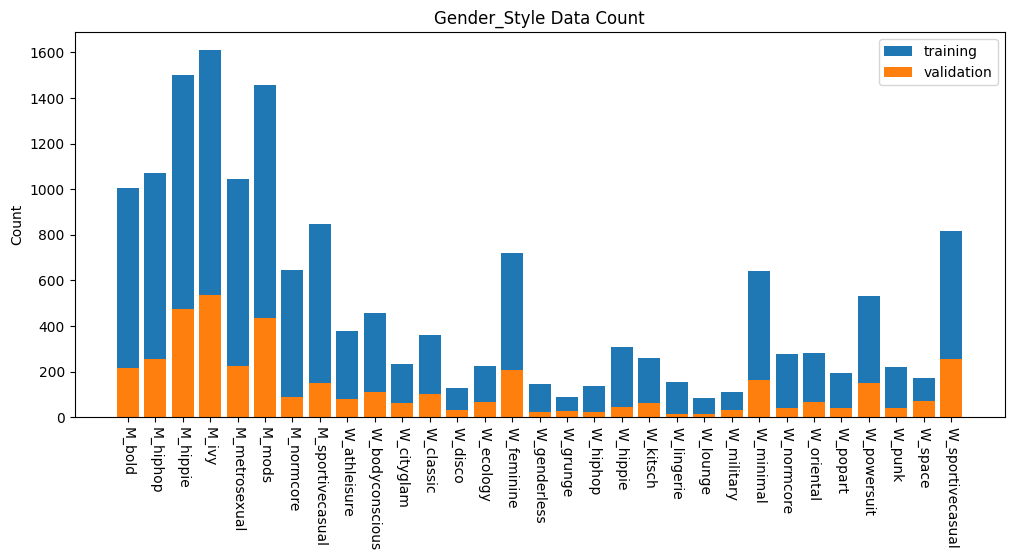

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

# Group화 된 데이터를 다시 데이터프레임으로 변환
training_count_data_re = training_count_data.reset_index()
validation_count_data_re = validation_count_data.reset_index()

# 겹치는 스타일이 있음으로 Gender와 Style결합
training_count_data_re['name'] = training_count_data_re['gender'] + '_' + training_count_data_re['style']
validation_count_data_re['name'] = validation_count_data_re['gender'] + '_' + validation_count_data_re['style']

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Gender_Style Data Count')
plt.ylabel('Count')
plt.xticks(rotation=270)
plt.bar(training_count_data_re['name'], training_count_data_re['training count'], label="training")
plt.bar(validation_count_data_re['name'], validation_count_data_re['validation count'], label="validation")

plt.legend()
plt.show()
plt.savefig('./gender_style_data_count.png')